In [ ]:
import pandas as pd
import numpy as np

import os
import sys

# librosa is a Python library for analyzing audio and music. It can be used to extract the data from the audio files we will see it later.
import librosa
import librosa.display
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.model_selection import train_test_split

# to play the audio files
from IPython.display import Audio

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [ ]:
from keras.layers.core import Dense, Activation, Dropout
from keras.layers import LSTM
from keras.models import Sequential
# import lstm, time 


In [ ]:
path_ = '/kaggle/input/bhahahahhhahahh/download.wav'

In [ ]:
paths = []
labels = []
for dirname, _, filenames in os.walk('//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/'):
    for filename in filenames:
        paths.append(os.path.join(dirname, filename))
        label = filename.split('_')[-1]
        label = label.split('.')[0]
        labels.append(label.lower())
    if len(paths) == 2800:
        break
print('Dataset is Loaded')

Dataset is Loaded


In [ ]:
len(paths)

2800

In [ ]:
paths[:5]

['//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/YAF_disgust/YAF_back_disgust.wav',
 '//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/YAF_disgust/YAF_bone_disgust.wav',
 '//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/YAF_disgust/YAF_calm_disgust.wav',
 '//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/YAF_disgust/YAF_bar_disgust.wav',
 '//content/drive/MyDrive/use/archive (17)/TESS Toronto emotional speech set data/YAF_disgust/YAF_burn_disgust.wav']

In [ ]:
labels[:5]

['disgust', 'disgust', 'disgust', 'disgust', 'disgust']

In [ ]:
## Create a dataframe
df = pd.DataFrame()
df['speech'] = paths
df['label'] = labels
df.head()

,speech,label
0,//content/drive/MyDrive/use/archive (17)/TESS ...,disgust
1,//content/drive/MyDrive/use/archive (17)/TESS ...,disgust
2,//content/drive/MyDrive/use/archive (17)/TESS ...,disgust
3,//content/drive/MyDrive/use/archive (17)/TESS ...,disgust
4,//content/drive/MyDrive/use/archive (17)/TESS ...,disgust


In [ ]:
df['label'].value_counts()

sad        600
ps         600
happy      400
fear       400
neutral    400
disgust    200
angry      200
Name: label, dtype: int64

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


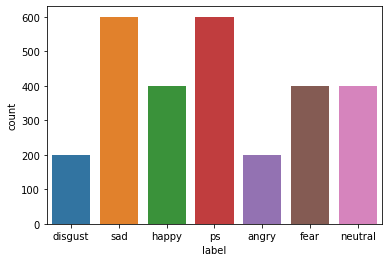

In [ ]:
sns.countplot(df['label'])

In [ ]:
def waveshow(data, sr, emotion):
    plt.figure(figsize=(10,4))
    plt.title(emotion, size=20)
    librosa.display.waveshow(data, sr=sr)
    plt.show()
    
def spectogram(data, sr, emotion):
    x = librosa.stft(data)
    xdb = librosa.amplitude_to_db(abs(x))
    plt.figure(figsize=(11,4))
    plt.title(emotion, size=20)
    librosa.display.specshow(xdb, sr=sr, x_axis='time', y_axis='hz')
    plt.colorbar()

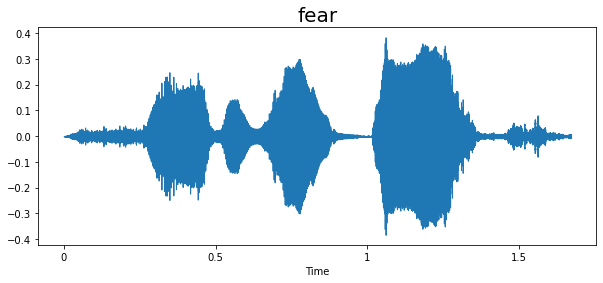

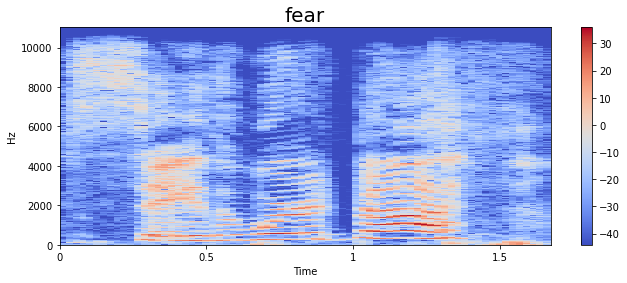

In [ ]:
emotion = 'fear'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

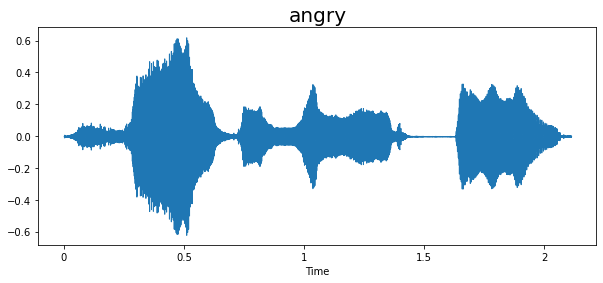

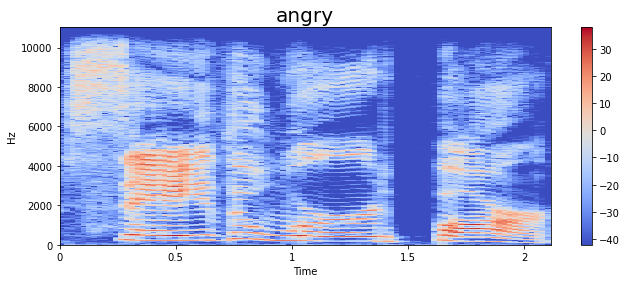

In [ ]:
emotion = 'angry'
path = np.array(df['speech'][df['label']==emotion])[1]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

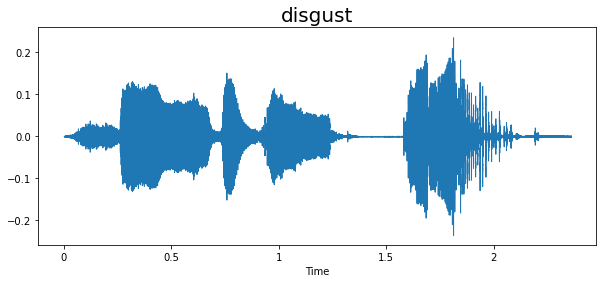

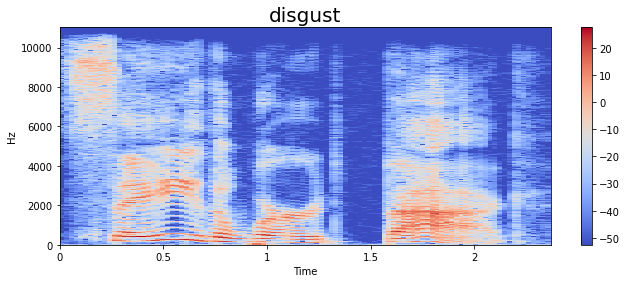

In [ ]:
emotion = 'disgust'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

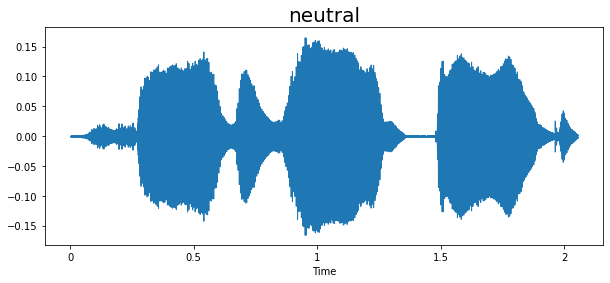

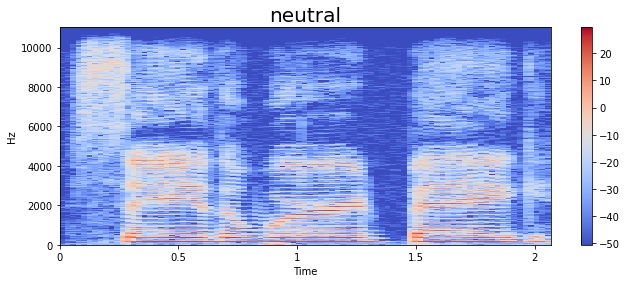

In [ ]:
emotion = 'neutral'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

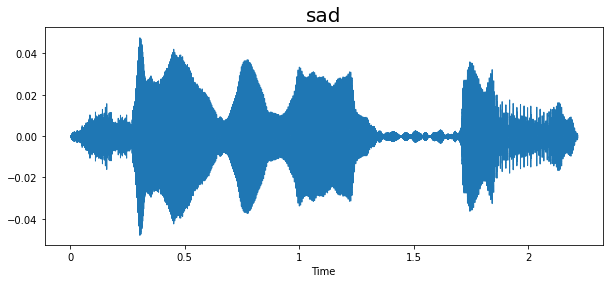

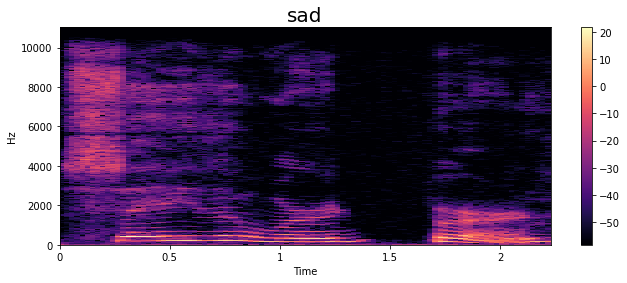

In [ ]:
emotion = 'sad'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

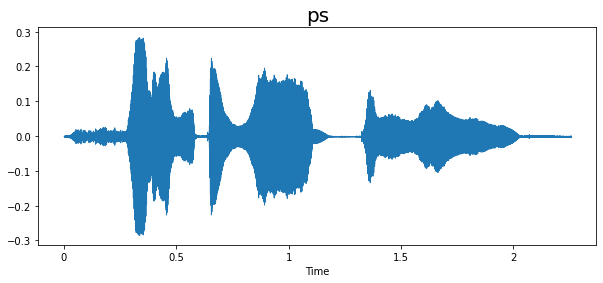

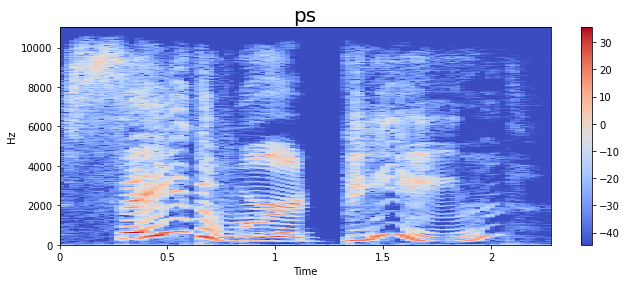

In [ ]:
emotion = 'ps'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

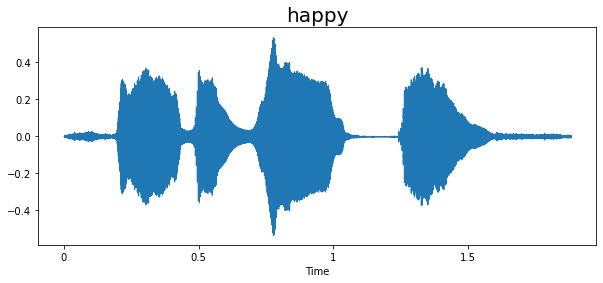

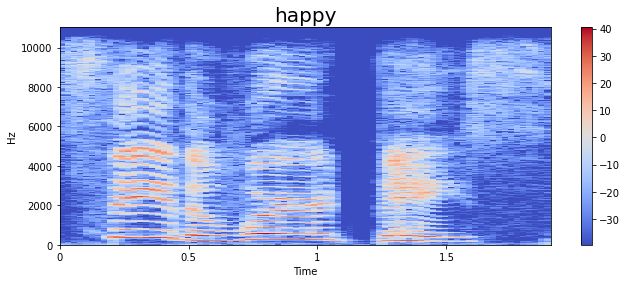

In [ ]:
emotion = 'happy'
path = np.array(df['speech'][df['label']==emotion])[0]
data, sampling_rate = librosa.load(path)
waveshow(data, sampling_rate, emotion)
spectogram(data, sampling_rate, emotion)
Audio(path)

In [ ]:
def extract_mfcc(filename):
    y, sr = librosa.load(filename, duration=3, offset=0.5)
    mfcc = np.mean(librosa.feature.mfcc(y=y, sr=sr, n_mfcc=40).T, axis=0)
    return mfcc

In [ ]:
extract_mfcc(df['speech'][0])

array([-4.0488113e+02,  1.0571973e+02, -2.2293524e+01,  1.0579778e+01,
       -6.1793575e+00,  1.1935399e+01, -1.5052888e+01, -3.1996655e+00,
       -1.0556440e+01,  2.2879899e+00, -1.1632494e+01, -7.2430462e-01,
       -7.7997785e+00,  1.6403626e+00, -1.8143222e+00, -3.3722858e+00,
       -6.6474152e+00,  3.0843482e+00, -7.9863071e+00, -1.1629339e+00,
       -6.5527058e+00, -1.5749952e+00, -3.7873893e+00,  4.7882442e+00,
       -2.9012752e+00,  2.4436200e+00, -4.2729297e+00,  1.1070122e+00,
       -2.1551902e+00,  2.8520954e+00, -2.1065810e+00,  5.1824770e+00,
       -1.8369864e+00,  1.6098863e+00,  2.1324334e+00, -7.5778902e-02,
        1.9536355e+00,  1.9939415e+00,  3.2988379e+00,  5.1949825e+00],
      dtype=float32)

In [ ]:
X_mfcc = df['speech'].apply(lambda x: extract_mfcc(x))
X_mfcc

0       [-404.88113, 105.71973, -22.293524, 10.579778,...
1       [-441.6417, 124.37989, -10.700918, 22.993933, ...
2       [-386.2119, 116.56824, -18.673038, 14.580149, ...
3       [-425.7947, 119.196754, -11.689642, 2.2419, -1...
4       [-431.6326, 127.572754, 0.49806842, 2.0518894,...
                              ...                        
2795    [-376.14896, 75.20519, 9.374039, 21.610195, 0....
2796    [-410.6418, 92.37401, -6.675477, 27.729353, 4....
2797    [-393.4053, 103.204315, -6.0987973, 27.220306,...
2798    [-398.86728, 103.01931, -17.03827, 17.8119, -5...
2799    [-429.9648, 60.94921, -1.4690353, 41.219997, -...
Name: speech, Length: 2800, dtype: object

In [ ]:
X = [x for x in X_mfcc]
X = np.array(X)
X.shape

(2800, 40)

In [ ]:
## input split
X = np.expand_dims(X, -1)
X.shape

(2800, 40, 1)

In [ ]:
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder()
y = enc.fit_transform(df[['label']])

In [ ]:
y = y.toarray()
y.shape

(2800, 7)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout

model = Sequential([
    LSTM(256, return_sequences=False, input_shape=(40,1)),
    Dropout(0.2),
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(7, activation='softmax')
])

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 256)               264192    
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               32896     
                                                                 
 dropout_1 (Dropout)         (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_2 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 7)                 4

In [ ]:
# Train the model
history = model.fit(X, y, validation_split=0.2, epochs=50, batch_size=64)

Epoch 1/50
35/35 [==============================] - 11s 222ms/step - loss: 1.1288 - accuracy: 0.5737 - val_loss: 0.2434 - val_accuracy: 0.9214
Epoch 2/50
35/35 [==============================] - 7s 208ms/step - loss: 0.3065 - accuracy: 0.9045 - val_loss: 0.0467 - val_accuracy: 0.9911
Epoch 3/50
35/35 [==============================] - 7s 205ms/step - loss: 0.1168 - accuracy: 0.9688 - val_loss: 0.1045 - val_accuracy: 0.9750
Epoch 4/50
35/35 [==============================] - 7s 210ms/step - loss: 0.1021 - accuracy: 0.9719 - val_loss: 0.0320 - val_accuracy: 0.9911
Epoch 5/50
35/35 [==============================] - 7s 210ms/step - loss: 0.1037 - accuracy: 0.9750 - val_loss: 0.0562 - val_accuracy: 0.9857
Epoch 6/50
35/35 [==============================] - 8s 219ms/step - loss: 0.0583 - accuracy: 0.9844 - val_loss: 0.0278 - val_accuracy: 0.9946
Epoch 7/50
35/35 [==============================] - 7s 209ms/step - loss: 0.0738 - accuracy: 0.9786 - val_loss: 0.0342 - val_accuracy: 0.9893
Epoch

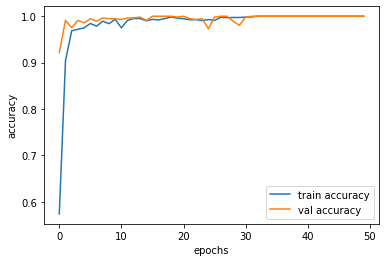

In [ ]:
epochs = list(range(50))
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(epochs, acc, label='train accuracy')
plt.plot(epochs, val_acc, label='val accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()

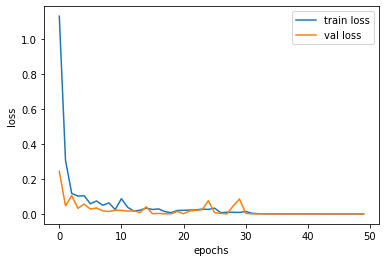

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']

plt.plot(epochs, loss, label='train loss')
plt.plot(epochs, val_loss, label='val loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()